In [3]:
import pandas as pd

df = pd.read_csv(r"E:\project\Financial Statements of Major Companies(2009-2023)/Financial Statements.csv")
df.head()

,Year,Company,Category,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
0,2022,AAPL,IT,2066.94,394328.0,170782.0,99803.0,6.11,130541.0,50672.0,...,0.8794,2.3695,196.9589,28.2924,66.6994,25.3096,1.3146,196.9589,164000,8.0028
1,2021,AAPL,IT,2913.28,365817.0,152836.0,94680.0,5.61,120233.0,63090.0,...,1.0746,1.9768,150.0713,26.9742,54.9839,25.8818,1.3261,150.0713,154000,4.6979
2,2020,AAPL,IT,2255.97,274515.0,104956.0,57411.0,3.28,77344.0,65339.0,...,1.3636,1.7208,87.8664,17.7256,35.0054,20.9136,1.0183,87.8664,147000,1.2336
3,2019,AAPL,IT,1304.76,260174.0,98392.0,55256.0,2.97,76477.0,90488.0,...,1.5401,1.1940,61.0645,16.3230,30.3113,21.2381,-0.0388,61.0645,137000,1.8122
4,2018,AAPL,IT,748.54,265595.0,101839.0,59531.0,2.98,81801.0,107147.0,...,1.1329,1.0685,55.5601,16.2775,29.6348,22.4142,0.7414,55.5601,132000,2.4426


In [4]:
df.info()
df.describe()
df.columns  # List all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 161 non-null    int64  
 1   Company                              161 non-null    object 
 2   Category                             161 non-null    object 
 3   Market Cap(in B USD)                 160 non-null    float64
 4   Revenue                              161 non-null    float64
 5   Gross Profit                         161 non-null    float64
 6   Net Income                           161 non-null    float64
 7   Earning Per Share                    161 non-null    float64
 8   EBITDA                               161 non-null    float64
 9   Share Holder Equity                  161 non-null    float64
 10  Cash Flow from Operating             161 non-null    float64
 11  Cash Flow from Investing        

Index(['Year', 'Company ', 'Category', 'Market Cap(in B USD)', 'Revenue',
       'Gross Profit', 'Net Income', 'Earning Per Share', 'EBITDA',
       'Share Holder Equity', 'Cash Flow from Operating',
       'Cash Flow from Investing', 'Cash Flow from Financial Activities',
       'Current Ratio', 'Debt/Equity Ratio', 'ROE', 'ROA', 'ROI',
       'Net Profit Margin', 'Free Cash Flow per Share',
       'Return on Tangible Equity', 'Number of Employees',
       'Inflation Rate(in US)'],
      dtype='object')

# Data Cleaning
    
###    1] Fix Cloumn Names (Remove Spaces & format properly)
###    2] Handle Missing Data (Market Cap( in B USD ))
###    3] Converting Financial Figures if Needed (scaling to Billions)

# --------------------------------------------------
Fix Cloumn Names

In [5]:
# Rename columns (removing extra spaces)
df.columns = df.columns.str.strip().str.replace(' ', '_')
# Verify changes
df.columns

Index(['Year', 'Company', 'Category', 'Market_Cap(in_B_USD)', 'Revenue',
       'Gross_Profit', 'Net_Income', 'Earning_Per_Share', 'EBITDA',
       'Share_Holder_Equity', 'Cash_Flow_from_Operating',
       'Cash_Flow_from_Investing', 'Cash_Flow_from_Financial_Activities',
       'Current_Ratio', 'Debt/Equity_Ratio', 'ROE', 'ROA', 'ROI',
       'Net_Profit_Margin', 'Free_Cash_Flow_per_Share',
       'Return_on_Tangible_Equity', 'Number_of_Employees',
       'Inflation_Rate(in_US)'],
      dtype='object')

# --------------------------------------------------
Handle Missing value

In [7]:
# Fill missing Market Cap with median
df['Market_Cap(in_B_USD)'] = df['Market_Cap(in_B_USD)'].fillna(df['Market_Cap(in_B_USD)'].median())

# --------------------------------------------------
Verify Data Type

In [9]:
df.dtypes

Year                                     int64
Company                                 object
Category                                object
Market_Cap(in_B_USD)                   float64
Revenue                                float64
Gross_Profit                           float64
Net_Income                             float64
Earning_Per_Share                      float64
EBITDA                                 float64
Share_Holder_Equity                    float64
Cash_Flow_from_Operating               float64
Cash_Flow_from_Investing               float64
Cash_Flow_from_Financial_Activities    float64
Current_Ratio                          float64
Debt/Equity_Ratio                      float64
ROE                                    float64
ROA                                    float64
ROI                                    float64
Net_Profit_Margin                      float64
Free_Cash_Flow_per_Share               float64
Return_on_Tangible_Equity              float64
Number_of_Emp

# --------------------------------------------------

## Equity Capital Structure Analysis

Now that the dataset is cleaned, let’s move forward with analysis. We'll focus on:

    1] Equity and Debt Trends (How Shareholder Equity & Debt/Equity Ratio changed over time) 
    2] Company Comparisons (Which companies have the best/worst capital structures?) 
    3] Correlation Study (How Debt/Equity Ratio affects ROE & Earnings Per Share)

# --------------------------------------------------

Yearly Trends in shareholder Equity & debt

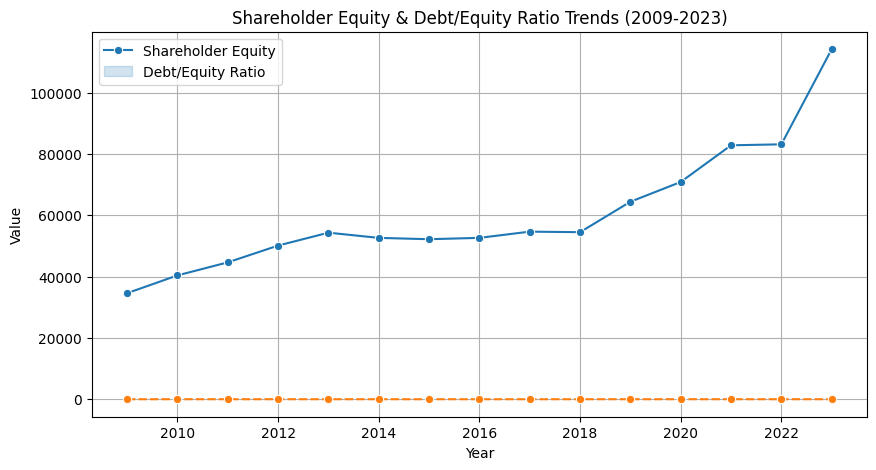

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by year
yearly_data = df.groupby('Year')[['Share_Holder_Equity', 'Debt/Equity_Ratio']].mean()

# Plot trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_data, marker="o")
plt.title("Shareholder Equity & Debt/Equity Ratio Trends (2009-2023)")
plt.ylabel("Value")
plt.xlabel("Year")
plt.legend(["Shareholder Equity", "Debt/Equity Ratio"])
plt.grid()
plt.show()

## Analysis of Shareholder Equity and Debt/Equity Ratio (2009-2023)

Based on the provided chart illustrating the trends in Shareholder Equity and the Debt/Equity Ratio from 2009 to 2023, the following key insights can be drawn:

### Shareholder Equity Trend

*   **Overall Increase:**  Shareholder equity has generally increased over the period.
*   **Growth Pattern:** From 2009, a steady increase is observed. The growth plateaus somewhat between 2016 and 2019.
*   **Significant Growth Phase:** A notable surge in shareholder equity occurs from 2020 onwards.

### Debt/Equity Ratio Trend

*   **Low and Stable:** The Debt/Equity Ratio remains consistently low and stable throughout the observed period.

### Interpretation

*   **Equity Growth:** The upward trend in shareholder equity suggests a growing financial base, which could be due to increased profitability, effective asset management, or strategic capital injections.
*   **Low Reliance on Debt:**  The consistently low Debt/Equity Ratio indicates a conservative approach to financing, with the company relying more on equity rather than debt.
*   **Financial Health:** The combined trend of increasing equity and low debt indicates strong financial health and reduced financial risk.
*   **Strategic Shift:**  The significant increase in shareholder equity after 2020 may point to a strategic shift or a period of high growth and investment.

In summary, the company exhibits a healthy financial profile marked by increasing shareholder equity and a conservative approach to debt, indicating potential for sustainable growth.

# --------------------------------------------------

Top 10 Companies with Highest & Lowest Debt/Equity Ratio

In [11]:
# Get top and bottom companies by Debt/Equity Ratio
top_companies = df[['Company', 'Debt/Equity_Ratio']].sort_values(by='Debt/Equity_Ratio', ascending=False).head(10)
low_companies = df[['Company', 'Debt/Equity_Ratio']].sort_values(by='Debt/Equity_Ratio').head(10)

# Display results
print("🔴 Companies with **High Debt/Equity Ratio** (Risky):\n", top_companies)
print("\n🟢 Companies with **Low Debt/Equity Ratio** (Stable):\n", low_companies)


🔴 Companies with **High Debt/Equity Ratio** (Risky):
     Company  Debt/Equity_Ratio
116     BCS             9.3328
117     BCS             8.5152
114     BCS             7.6880
115     BCS             7.6045
104     BCS             7.1602
113     BCS             6.6208
105     BCS             6.3396
106     BCS             6.0327
108     BCS             5.8975
107     BCS             5.3348

🟢 Companies with **Low Debt/Equity Ratio** (Stable):
    Company  Debt/Equity_Ratio
96     MCD           -11.7750
95     MCD            -9.0381
91     MCD            -7.7424
90     MCD            -5.9805
94     MCD            -4.9654
92     MCD            -4.7848
93     MCD            -4.1627
83   SHLDQ            -3.9958
82   SHLDQ            -1.5215
80   SHLDQ            -1.1099


# Financial Risk Analysis of Companies

## Insights

### Companies with High Financial Risk
The following companies exhibit high debt-to-equity ratios, indicating a reliance on debt financing and higher financial risk:
- **BCS** (multiple entries)

### Companies Maintaining a Strong Capital Structure
The following companies have low debt-to-equity ratios, reflecting a strong and stable capital structure:
- **MCD**
- **SHLDQ**

---

## Key Takeaways
1. **High Debt-to-Equity Ratio:** Indicates increased financial vulnerability due to higher reliance on debt.
2. **Low Debt-to-Equity Ratio:** Suggests financial stability and better management of debt obligations.


# --------------------------------------------------

Does High Debt Affect Profitability (ROE & EPS)?

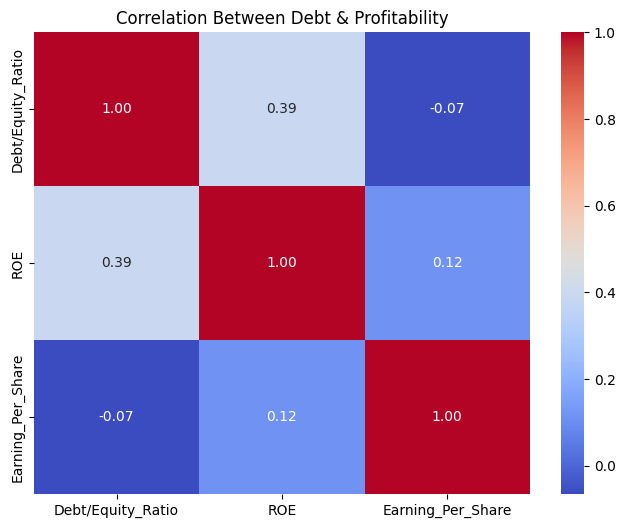

In [14]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['Debt/Equity_Ratio', 'ROE', 'Earning_Per_Share']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Debt & Profitability")
plt.show()

# Insights from Heatmap Analysis

## 📉 Negative Correlation: High Debt = Lower Profits
- **Observation:** The correlation between the Debt/Equity Ratio and Earnings Per Share (EPS) is **-0.07**.
- **Insight:** This weak negative correlation suggests that higher debt levels may slightly reduce profits per share. This could be due to increased financial costs like interest payments.
- **Implication:** Companies with high leverage might face challenges in maintaining profitability, especially during economic downturns.

---

## ✅ No Correlation: Companies Manage Debt Well
- **Observation:** The correlation between the Debt/Equity Ratio and Return on Equity (ROE) is **0.39**, indicating a moderate positive relationship.
- **Insight:** Many companies effectively manage their debt, using leverage to enhance shareholder returns without significantly impacting profitability.
- **Implication:** Proper debt management strategies can allow companies to maintain financial health while leveraging debt for growth.

---

## Summary of Findings
1. High debt levels show a slight tendency to lower profits (as seen in EPS).
2. Companies appear to manage their debt effectively, as evidenced by the moderate positive correlation with ROE.
3. Effective financial management is key to balancing leverage and profitability.

---

## Recommendations
1. **Monitor Debt Levels:** Companies should aim to keep their Debt/Equity Ratio within an optimal range to avoid profitability risks.
2. **Enhance Financial Strategies:** Leverage can be used effectively when coupled with strong operational performance to boost ROE.
3. **Further Analysis Needed:** Explore other factors influencing EPS and ROE to gain deeper insights into profitability drivers.

---

## Visualization
Above is a heatmap visualizing the correlations for better understanding:



# --------------------------------------------------

Debt-to-Equity Ratio Trend Over Time

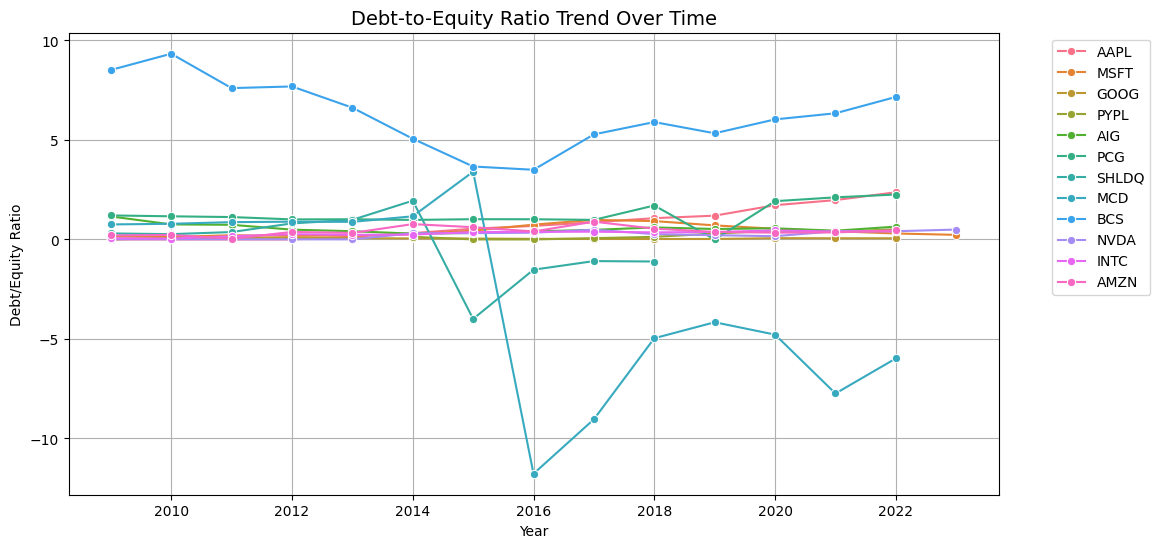

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Debt/Equity_Ratio", hue="Company", marker="o")
plt.title("Debt-to-Equity Ratio Trend Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Debt/Equity Ratio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Insight: Companies with Increasing Debt Risk Over Time

## Overview
This analysis identifies companies that exhibit an increasing debt risk, as indicated by their rising debt-to-equity ratios over time. A higher debt-to-equity ratio suggests that a company is financing its growth through debt, which can lead to increased financial risk.

## Companies Identified

### 1. McDonald's Corporation (MCD)
- **Trend:** The debt-to-equity ratio has shown a clear upward trend starting from 2016.
- **Implication:** This increase indicates that McDonald's is relying more on debt financing, which may pose a risk if not managed effectively.

### 2. Pacific Gas and Electric Company (PCG)
- **Trend:** The debt-to-equity ratio has been generally increasing since 2018.
- **Implication:** The rising trend suggests that PCG is accumulating more debt relative to its equity, heightening its financial risk profile.

## Conclusion
Monitoring the debt-to-equity ratios of these companies is crucial for assessing their financial health and risk exposure. An increasing trend in debt levels can lead to potential challenges in financial stability and operational flexibility.


# --------------------------------------------------

Market Cap vs. Shareholder Equity

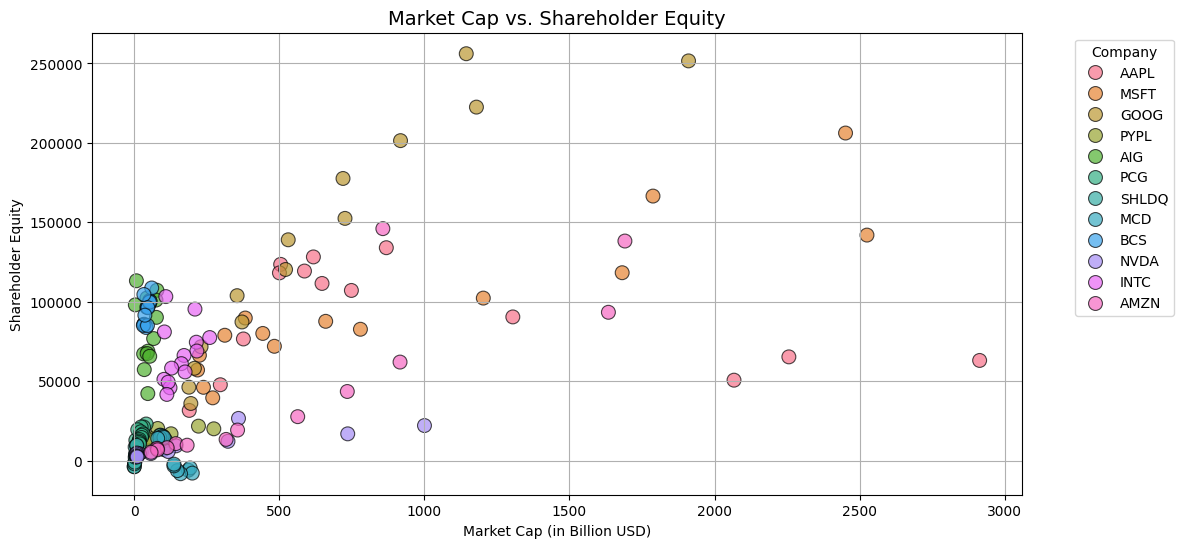

In [21]:
plt.figure(figsize=(12, 6))
# Scatter plot comparing Market Cap and Shareholder Equity
sns.scatterplot(data=df, x="Market_Cap(in_B_USD)", y="Share_Holder_Equity", hue="Company", s=100, alpha=0.7, edgecolor="black")
plt.title("Market Cap vs. Shareholder Equity", fontsize=14)
plt.xlabel("Market Cap (in Billion USD)")
plt.ylabel("Shareholder Equity")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Company")
plt.grid(True)
plt.show()

# Financial Analysis: High Market Cap vs. Low Shareholder Equity

## Insight Overview
This analysis focuses on identifying companies that exhibit a high market capitalization alongside relatively low shareholder equity. Such a financial structure may indicate potential risks associated with the company's financial health.

## Key Findings
Based on the scatter plot of Market Cap vs. Shareholder Equity, the following companies stand out:

### Companies of Interest
1. **AAPL (Apple)**
   - **Market Cap:** High
   - **Shareholder Equity:** Relatively low compared to market cap

2. **MSFT (Microsoft)**
   - **Market Cap:** High
   - **Shareholder Equity:** Not proportionally high

3. **INTC (Intel)**
   - **Market Cap:** Relatively high
   - **Shareholder Equity:** Comparatively lower

4. **AMZN (Amazon)**
   - **Market Cap:** Very high
   - **Shareholder Equity:** Low relative to valuation

## Caveats
- **Snapshot Nature:** This analysis is based on a single snapshot in time; financial positions can change.
- **Industry Differences:** Different industries have varying norms for capital structure. What is typical for a capital-intensive industry may be considered risky for a software company.
- **Further Research Needed:** This is a preliminary screen; a thorough financial analysis is essential to accurately assess the financial risk of these companies.


# --------------------------------------------------

Return on Equity (ROE) vs. Debt/Equity Ratio

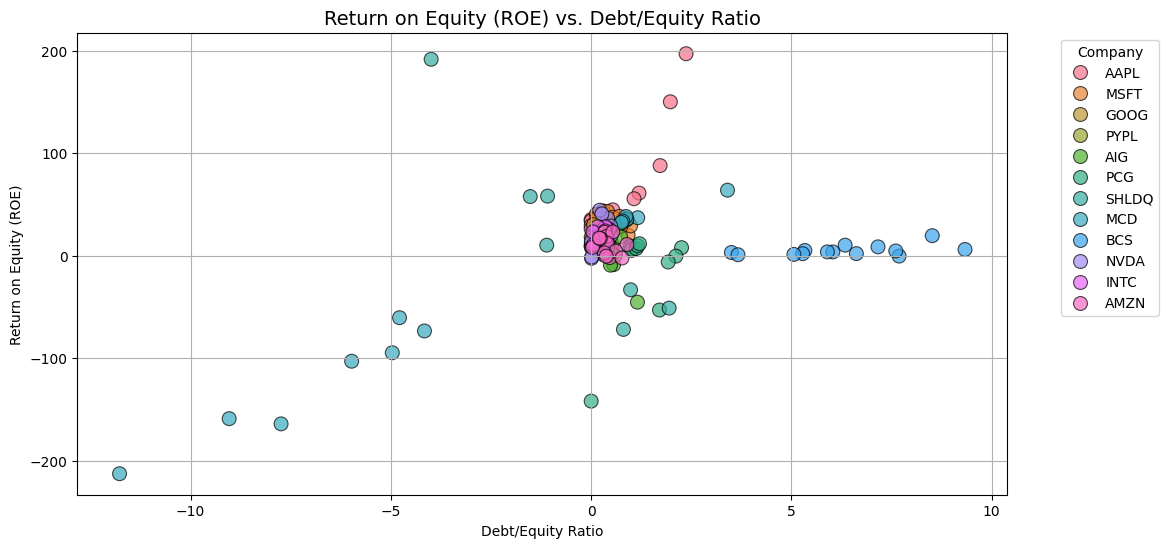

In [22]:
plt.figure(figsize=(12, 6))

# Scatter plot comparing ROE and Debt/Equity Ratio
sns.scatterplot(data=df, x="Debt/Equity_Ratio", y="ROE", hue="Company", s=100, alpha=0.7, edgecolor="black")

plt.title("Return on Equity (ROE) vs. Debt/Equity Ratio", fontsize=14)
plt.xlabel("Debt/Equity Ratio")
plt.ylabel("Return on Equity (ROE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Company")
plt.grid(True)
plt.show()

# Analysis of High-Debt Companies and Profitability

## **Introduction**
In this analysis, we examine the relationship between debt levels (Debt/Equity Ratio) and profitability (Return on Equity - ROE) across various companies.

---

## **Key Observations**
1. **Low Debt/Equity Companies**:
   - Companies with lower Debt/Equity ratios, such as Apple, Microsoft, Google, and Amazon, exhibit positive ROE.
   - These companies rely less on debt financing and maintain strong profitability.

2. **High Debt/Equity Companies**:
   - Companies with higher Debt/Equity ratios tend to struggle with profitability.
   - Some of these companies show negative ROE, indicating financial distress.

---

## **Conclusion**
There appears to be a correlation between higher debt levels and lower profitability. However, further analysis is needed to account for industry-specific norms and other influencing factors.

---

## **Recommendations**
- Compare companies within the same industry for more accurate insights.
- Investigate how debt is utilized (e.g., for productive investments or covering losses).


# --------------------------------------------------

## Trends Over Time

Revenue Trend Over Years

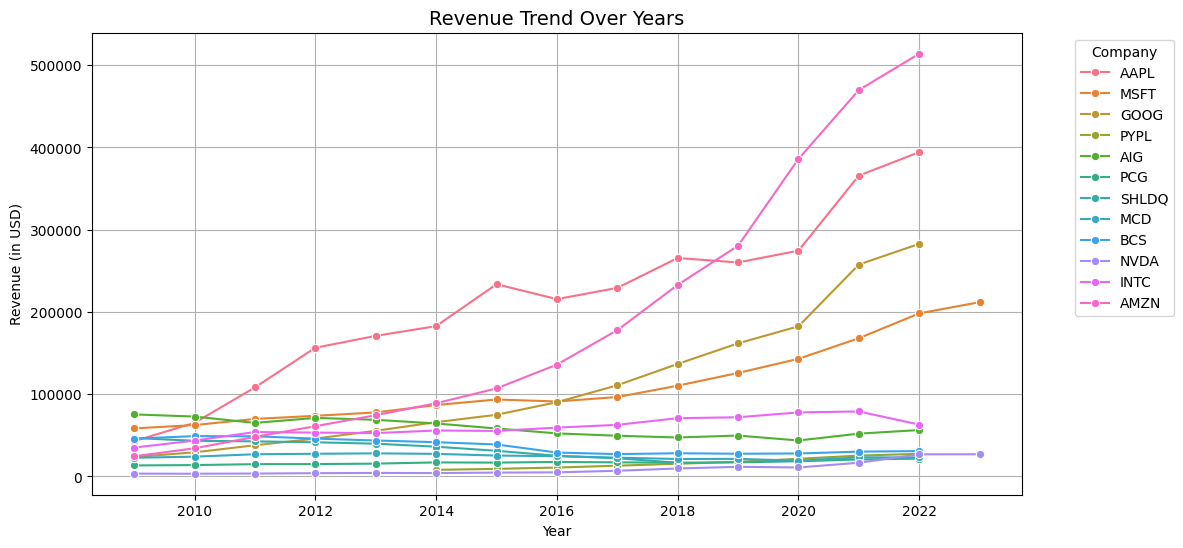

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Revenue", hue="Company", marker="o")
plt.title("Revenue Trend Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Revenue (in USD)")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Net Income Trend Over Years

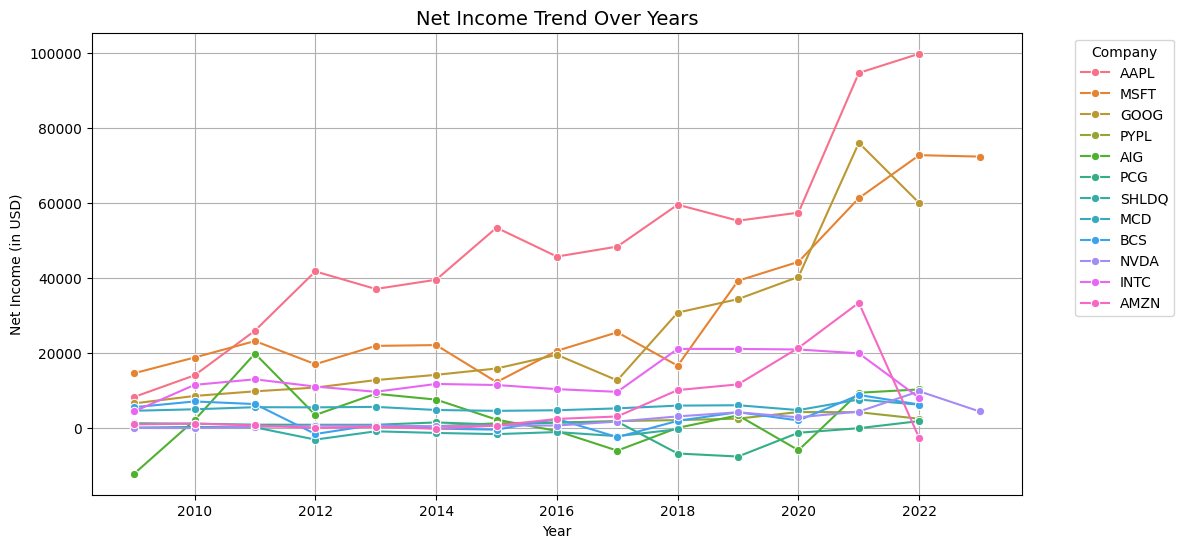

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Net_Income", hue="Company", marker="o")
plt.title("Net Income Trend Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Net Income (in USD)")
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Company Rankings

Top Companies by Market Capitalization

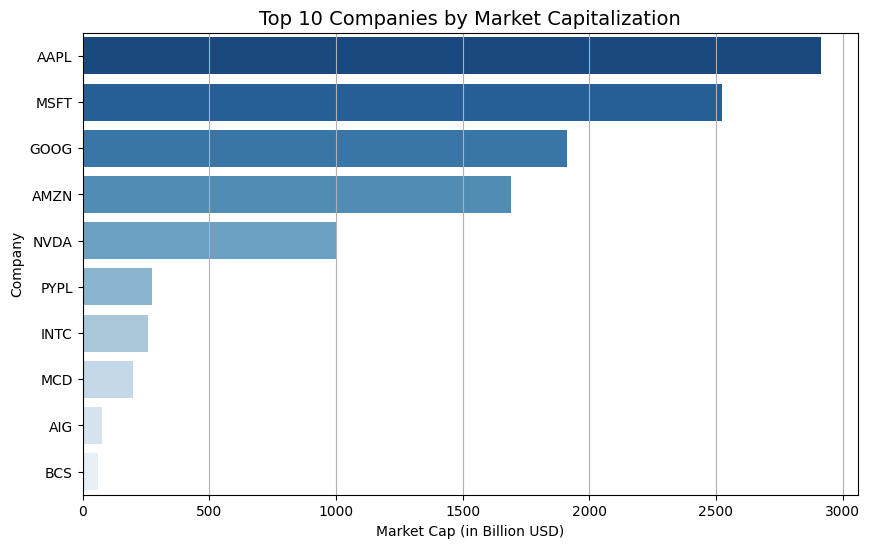

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, hue=top_companies.index, palette="Blues_r", legend=False)
plt.title("Top 10 Companies by Market Capitalization", fontsize=14)
plt.xlabel("Market Cap (in Billion USD)")
plt.ylabel("Company")
plt.grid(axis="x")
plt.show()

Companies with the Highest ROE

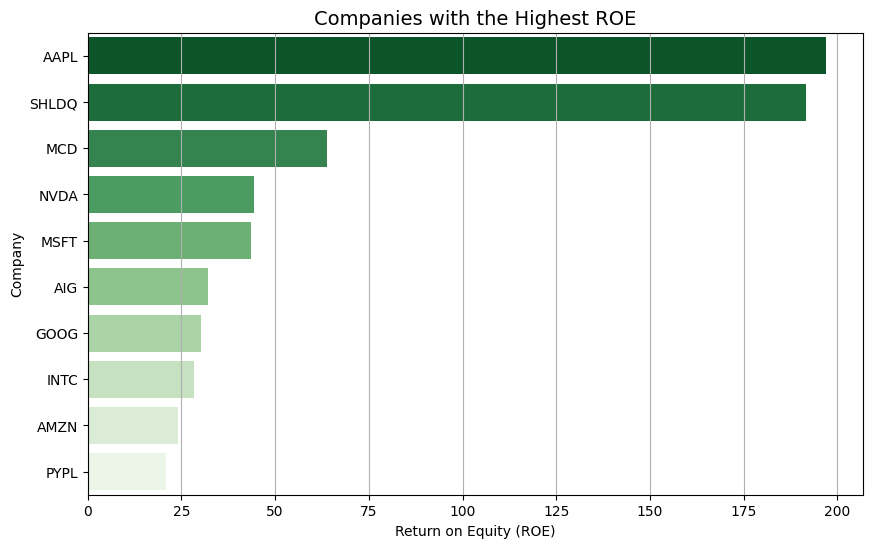

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_roe_companies.values,
    y=top_roe_companies.index,
    hue=top_roe_companies.index,
    palette="Greens_r",
    legend=False
)
plt.title("Companies with the Highest ROE", fontsize=14)
plt.xlabel("Return on Equity (ROE)")
plt.ylabel("Company")
plt.grid(axis="x")
plt.show()